# Admission Prediction
This dataset was built with the purpose of helping students in shortlisting universities with their profiles and it contains several parameters that are considered important during the application for master programs.
The predicted output gives them a far idea about their chances for a particular university.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop(columns=['Serial No.'])

In [2]:
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# checking for missing data
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
# rename some columns
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'university_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [7]:
data.describe()

,GRE,TOEFL,university_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


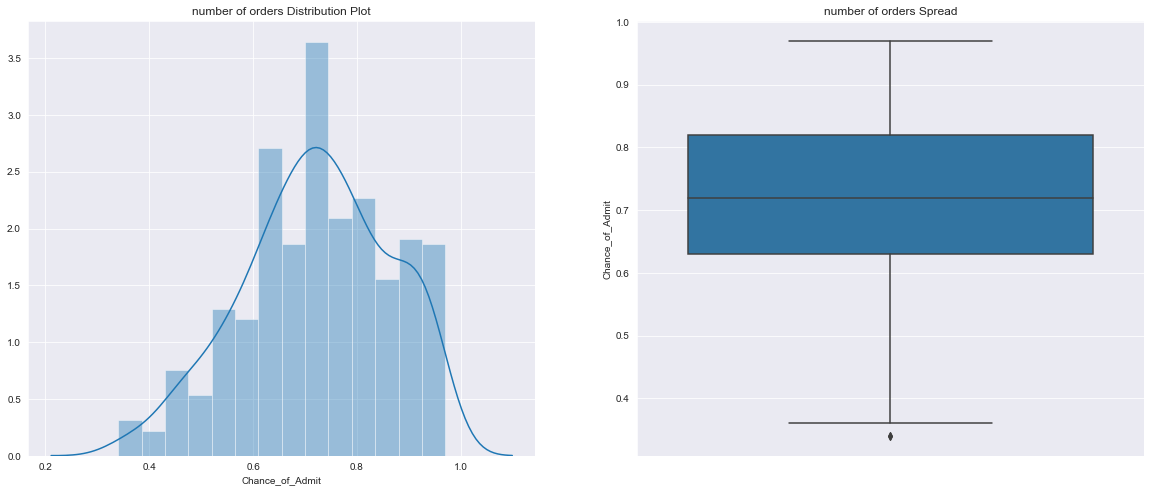

In [8]:
# visualize the target variable
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

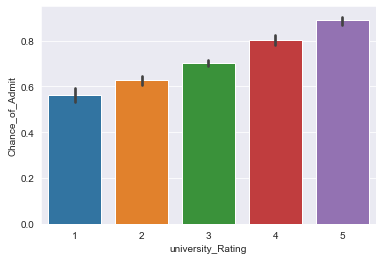

In [9]:
sb.barplot(data.university_Rating,data.Chance_of_Admit)

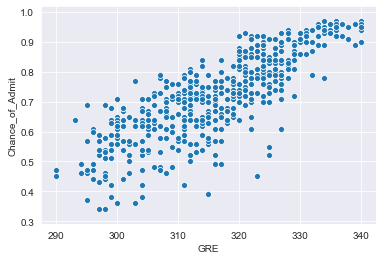

In [10]:
sb.scatterplot(data.GRE,data.Chance_of_Admit)

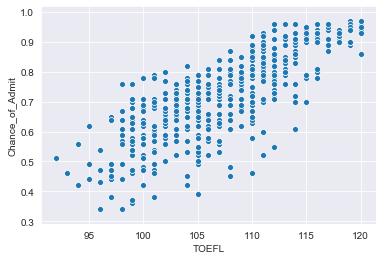

In [11]:
sb.scatterplot(data.TOEFL,data.Chance_of_Admit)

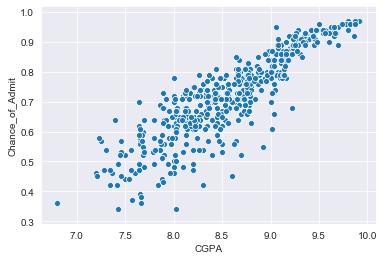

In [12]:
sb.scatterplot(data.CGPA,data.Chance_of_Admit)

From the above scatter plots, you notice taht as the GRE,CGPA and TOEFL increase the change of getting the admission increase too, there is a linear relationship between them.

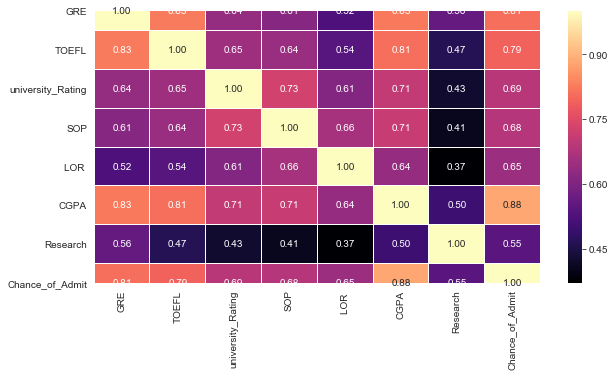

In [13]:
# looking for relevant independent variable

plt.figure(figsize=(10,5))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


In [14]:
(data.corr()**2)["Chance_of_Admit"].sort_values(ascending = False)[1:]

CGPA                 0.778652
GRE                  0.656668
TOEFL                0.627625
university_Rating    0.476283
SOP                  0.468043
LOR                  0.416495
Research             0.297975
Name: Chance_of_Admit, dtype: float64

The top 4 independent variable correlated to the target variable are CGPA,GRE,TOEFL and University Ranting.

In [15]:
# Performing some transformation 
data['Chance_of_Admit']=data['Chance_of_Admit']**2

In [16]:
# remove some outliers
## Deleting those some outliers. 
# previous_data = data.copy()
data = data[data.Chance_of_Admit >0.40]
data.reset_index(drop = True, inplace = True)

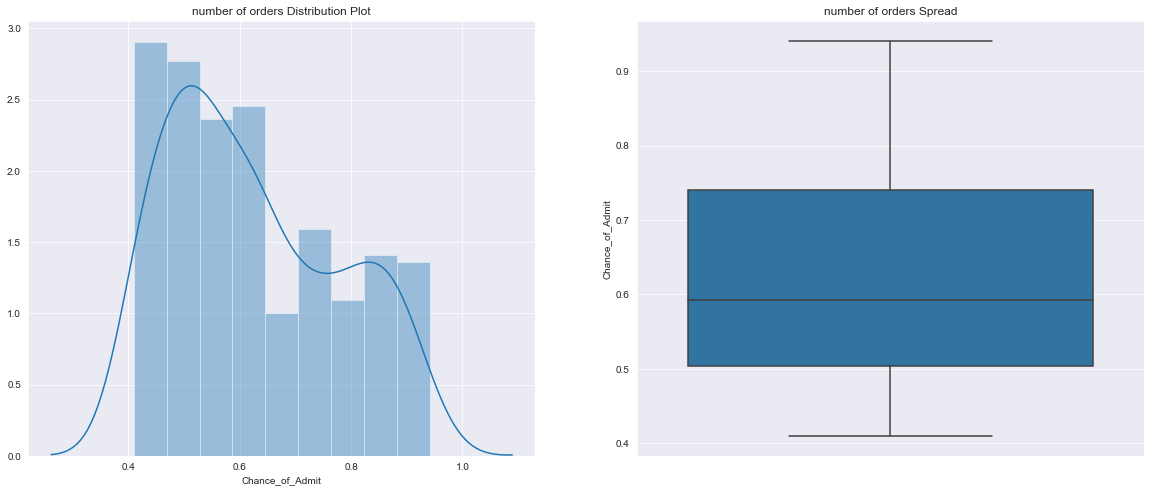

In [17]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

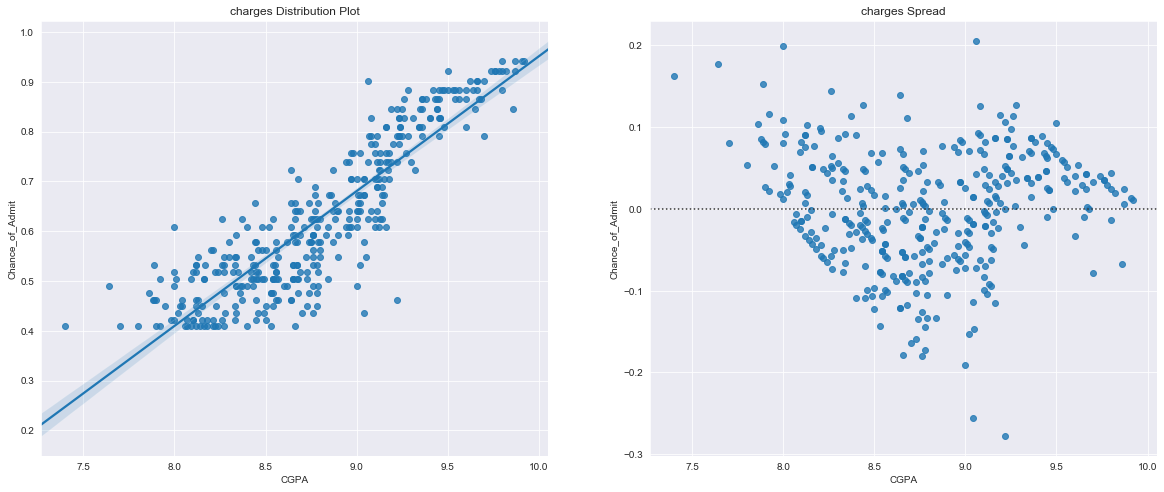

In [18]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.CGPA, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.CGPA, data.Chance_of_Admit)

plt.show()

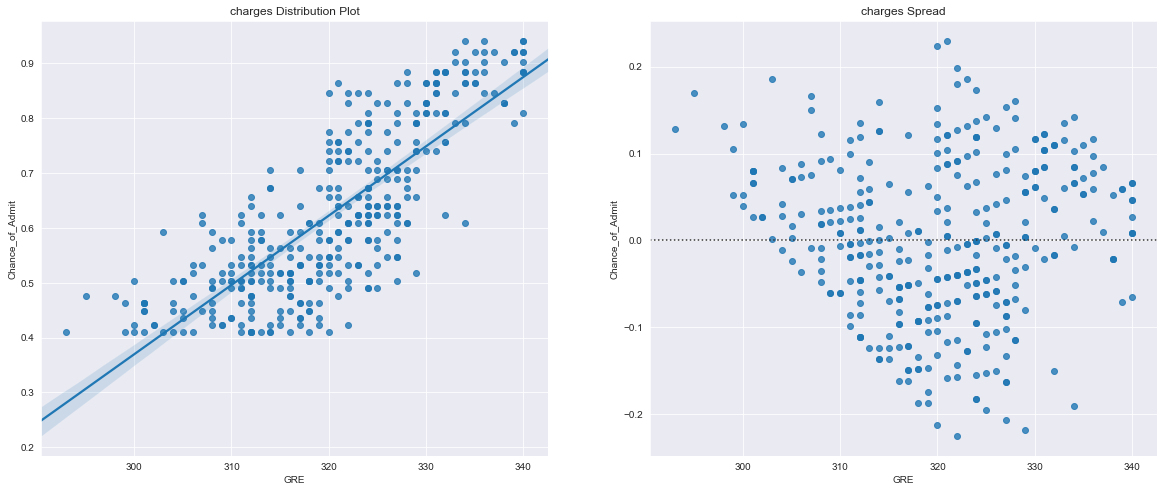

In [19]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.GRE, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.GRE, data.Chance_of_Admit)

plt.show()

From the above plot, we can see that there is not heterosedasticity between the target var and some independents variable.

In [20]:
data.columns

Index(['GRE', 'TOEFL', 'university_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [21]:
# data=data.drop(columns=['SOP','LOR ','Research'],axis=1)

In [22]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 7].values


In [23]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# using pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.61921189 0.13703767]


In [26]:
# Fitting linear regression Regression to the dataset
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression(normalize=True)
Lin_regressor.fit(X_train, y_train)
y_pred=Lin_regressor.predict(X_test)
y_train_pred=Lin_regressor.predict(X_train)

the accuracy.std() is low which means our variance is low whats is good

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import r2_score
print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred)*100)


RMSE score on the test set: 0.06458636660278361
RMSE score on the training set: 0.06203539516763837
R2 score on the test set: 82.29216489905946
R2 score on the training set: 83.42041387182823


In [28]:
from sklearn.ensemble import RandomForestRegressor
RDF_regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
RDF_regressor.fit(X_train, y_train)
y_pred2=RDF_regressor.predict(X_test)
y_train_pred2=RDF_regressor.predict(X_train)

In [29]:
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred2)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred2)))

print("R2 score on the test set:",r2_score(y_test, y_pred2)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred2)*100)


RMSE score on the test set: 0.061646925488804565
RMSE score on the training set: 0.023924785311686174
R2 score on the test set: 83.86731677657461
R2 score on the training set: 97.53401359634837


The linear regression perform better !, the rmse difference between the test set and the training set of the linear regression is very small compared to the one of random forest regression.

In [30]:
# cross validation
# Applying k-Fold Cross Validation USED TO JUST IMPROVE THE MODEL PERFORMANCE(ACCURACY)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Lin_regressor, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(),accuracies.std())

0.8205816154821273 0.04170276297974753


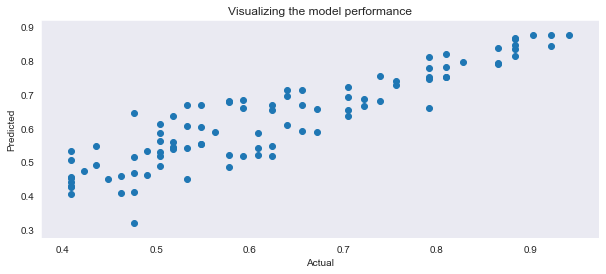

In [31]:
plt.figure(figsize=(10,4))
sb.set_style('darkgrid')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()

# conclusion
After analyzing the dataset, the linear regression remain the best model, there is a linear relationship between the target and most independent variables and I made sure some of the assumptions of linear regression were respected and the CGPA is the most important score to get admitted. 


# Outcome
For master program,most university requires students mostly international students to take some test like the GRE test which is a graduate entrance exam, the TOEFL test which is an english language skills and eventually the Cumulative Grade Point Average (CGPA) to evaluate the student's competence.
Having a good score in these tests enhance the chance of getting admitted.
However, this dataset's target the chance of getting admitted is ranged from 0 to 1, and transforming the target data and removing some outliers provide an amazing improvement in the model performance.
From the k-fold cross validation standard deviation result, this model perfom well but it can still perfom better maybe with other advanced model such as XGBOOST, Lasso and Ridge regression.

Thank you